<a href="https://colab.research.google.com/github/Ashwini-Padige/Machine-Learning-Algorithms/blob/main/Hiring_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Candidates hiring Prediction**

### **Problem Statement**
build a classification model predicting whether candidate will get hired or not.


### **Anonymized Features:**

C1: b, a.

C2: continuous.

C3: continuous.

C4: u, y, l, t.

C5: g, p, gg.

C6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.

C7: v, h, bb, j, n, z, dd, ff, o.

C8: continuous.

C9: t, f.

C10: t, f.

C11: continuous.

C12: t, f.

C13: g, p, s.

C14: continuous.

C15: continuous.



*   Output variable (desired target):
y - Hired Flag: 1,0
has the candidate hired or not?


♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦



# **Basic Analysis of Dataset from Problem Statement and Features**

*   It is a supervised learning problem - We are predicting target variable
*   From target varible we can clearly understand it is a classification problem
*   From target variable we can tell it is a binary classification problem.   target = (1/0)


# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# **Loading Dataset**

In [ ]:
df=pd.read_csv("/content/Hiring_Challenge.csv")

# **Analysis of Data**

In [ ]:
# Checking size of dataset
print("Data set size : ", df.shape)

Data set size :  (690, 16)


From the above result no of rows are 690 and no of columns are 16

In [ ]:
#Fetching top 5 row in dataset
df.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Hired
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1


In [ ]:
#Fetching Bottom 5 rows
df.tail()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Hired
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,0
689,b,35,3.375,u,g,c,h,8.29,f,f,0,t,g,0,0,0


In [ ]:
#finding the column names
df.columns

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'Hired'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C1      690 non-null    object 
 1   C2      690 non-null    object 
 2   C3      690 non-null    float64
 3   C4      690 non-null    object 
 4   C5      690 non-null    object 
 5   C6      690 non-null    object 
 6   C7      690 non-null    object 
 7   C8      690 non-null    float64
 8   C9      690 non-null    object 
 9   C10     690 non-null    object 
 10  C11     690 non-null    int64  
 11  C12     690 non-null    object 
 12  C13     690 non-null    object 
 13  C14     690 non-null    object 
 14  C15     690 non-null    int64  
 15  Hired   690 non-null    int64  
dtypes: float64(2), int64(3), object(11)
memory usage: 86.4+ KB


In [ ]:

#delete
#Basic statistical analysis of dataset
df.describe()

,C3,C8,C11,C15,Hired
count,690.000000,690.000000,690.00000,690.000000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507,0.444928
std,4.978163,3.346513,4.86294,5210.102598,0.497318
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,0.165000,0.00000,0.000000,0.000000
50%,2.750000,1.000000,0.00000,5.000000,0.000000
75%,7.207500,2.625000,3.00000,395.500000,1.000000
max,28.000000,28.500000,67.00000,100000.000000,1.000000


From statistical result we can understatnd the basic statistical report of min, max, percentile, mean and standard deviation

In [ ]:
#checking for the data is balanced or not
df['Hired'].value_counts()

0    383
1    307
Name: Hired, dtype: int64

From the above result we can clearly understand that the dataset is balanced.

# **Data Preprocessing**
# **Data Cleaning**

Data cleaning is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset to improve its quality and ensure that it is ready for analysis. It involves tasks such as handling missing or duplicate data, correcting data types, and removing outliers or irrelevant information.

In [ ]:
df.C1.unique()

array(['b', 'a', '?'], dtype=object)

In [ ]:
df = df.replace(regex = True, to_replace = '[^0-9.a-z]', value = np.nan)
df.C1.unique()

array(['b', 'a', nan], dtype=object)

In [ ]:
df.dtypes

C1        object
C2        object
C3       float64
C4        object
C5        object
C6        object
C7        object
C8       float64
C9        object
C10       object
C11        int64
C12       object
C13       object
C14       object
C15        int64
Hired      int64
dtype: object

In [ ]:
# change to correct format
df.C2 = df.C2.astype("float64")

df.C14 = df.C14.fillna(0)
df.C14 = df.C14.astype("int64")

In [ ]:
df.dtypes

C1        object
C2       float64
C3       float64
C4        object
C5        object
C6        object
C7        object
C8       float64
C9        object
C10       object
C11        int64
C12       object
C13       object
C14        int64
C15        int64
Hired      int64
dtype: object

### **Missing Values**

In [ ]:
#checking for null values
df.isnull().sum()

C1       12
C2       12
C3        0
C4        6
C5        6
C6        9
C7        9
C8        0
C9        0
C10       0
C11       0
C12       0
C13       0
C14       0
C15       0
Hired     0
dtype: int64

**Column "C1"**

In [ ]:
df['C1'] = df['C1'].fillna(df['C1'].mode()[0])
df = df.drop_duplicates() # code to delete duplicates

### **Outlier Deduction and Correction**
**Outlier Detection**
1.   Z-Score
      Z-Score(x)=(x-mean(x)) / SD(x)
      **Threshold Limit**
      Z-Score > 3 and Z-Score < -3 ---> Outlier
2.   IQR
      IQR = Q3(75%)-Q1(25%)
      **Upper Threshold** = Q3 + (1.5 * IQR)
      **Lower Threshold** = Q1 - (1.5 * IQR)
3.   Plotting
      Box Plot

**Outlier Correction**
1.   Deletion
2.   Clip/Strip


**Column "C2"**

In [ ]:
df['C2'] = df['C2'].fillna(df['C2'].mean(), downcast=False)

In [ ]:
df.describe()

,C2,C3,C8,C11,C14,C15,Hired
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,180.547826,1017.385507,0.444928
std,11.853273,4.978163,3.346513,4.86294,173.970323,5210.102598,0.497318
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,60.000000,0.000000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,160.000000,5.000000,0.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,395.500000,1.000000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000,1.000000


<Axes: xlabel='C2'>

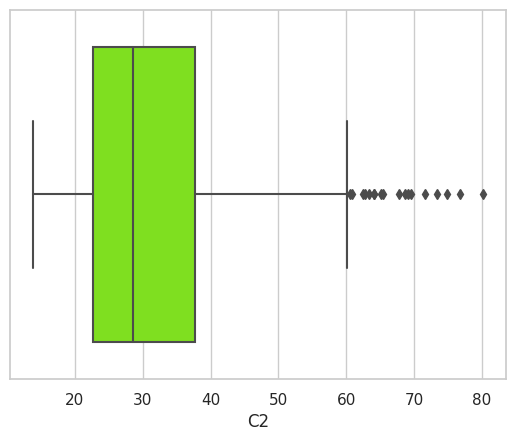

In [ ]:
#Outlier Detection using Box Plot for "C2" Column
sns.set(style="whitegrid")
sns.boxplot(x=df['C2'], color='Chartreuse')

From outlier we can see that there are many dots are displayed outside whisker.

In [ ]:
# removing outlier for 'C2' column
iqr = df.C2.quantile(0.75) - df.C2.quantile(0.25)
upper_threshold = df.C2.quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = df.C2.quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
upper_threshold,lower_threshold

(60.26374999999999, 0.11375000000001023)

In [ ]:
df.C2 = df.C2.clip (lower_threshold, upper_threshold)

**Column "C3"**

<Axes: xlabel='C3'>

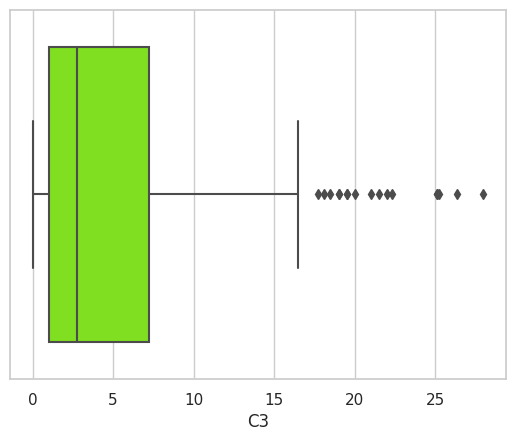

In [ ]:
#Outlier Detuction using Box Plot for "C3" Column
sns.set(style="whitegrid")
sns.boxplot(x=df['C3'], color='Chartreuse')

In [ ]:
# removing outlier for 'C3' column
iqr = df.C3.quantile(0.75) - df.C3.quantile(0.25)
upper_threshold = df.C3.quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = df.C3.quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
print(upper_threshold,lower_threshold)

df.C3 = df.C3.clip (lower_threshold, upper_threshold)

16.518749999999997 -8.31125


**Column "C4"**

In [ ]:
df.C4.unique()
df['C4'].value_counts()

u    519
y    163
l      2
Name: C4, dtype: int64

In [ ]:
df['C4'] = df['C4'].fillna(df['C4'].mode()[0])

In [ ]:
df['C4'].value_counts()

u    525
y    163
l      2
Name: C4, dtype: int64

**Column "C5"**

In [ ]:
df.C5.unique()

df['C5'] = df['C5'].fillna(df['C5'].mode()[0])

**Column "C6"**

In [ ]:
df.C6.unique()

df['C6'] = df['C6'].fillna(df['C6'].mode()[0])

**Column "C7"**

In [ ]:
df.C7.unique()

df['C7'] = df['C7'].fillna(df['C7'].mode()[0])

**Column "C8"**

<Axes: xlabel='C8'>

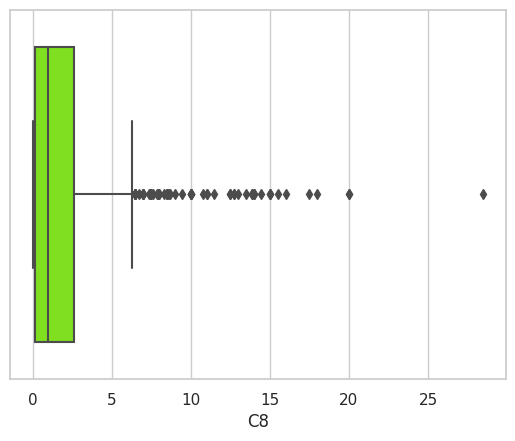

In [ ]:
#Outlier Detuction using Box Plot for "C8" Column
sns.set(style="whitegrid")
sns.boxplot(x=df['C8'], color='Chartreuse')

In [ ]:
# removing outlier for 'C8' column
iqr = df.C8.quantile(0.75) - df.C8.quantile(0.25)
upper_threshold = df.C8.quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = df.C8.quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
print(upper_threshold,lower_threshold)

df.C8 = df.C8.clip (lower_threshold, upper_threshold)

6.3149999999999995 -3.525


**column  "C9", "C10"**

In [ ]:
df.C9.unique()

df.C10.unique()

array(['t', 'f'], dtype=object)

**Column "C11"**

<Axes: xlabel='C11'>

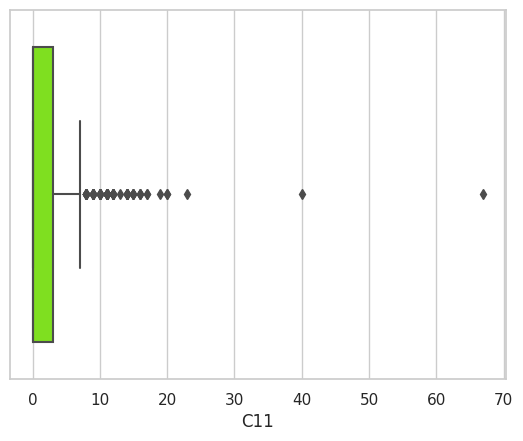

In [ ]:
#Outlier Detuction using Box Plot for "C11" Column
sns.set(style="whitegrid")
sns.boxplot(x=df['C11'], color='Chartreuse')

In [ ]:
# removing outlier for 'C11' column
iqr = df.C11.quantile(0.75) - df.C11.quantile(0.25)
upper_threshold = df.C11.quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = df.C11.quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
print(upper_threshold,lower_threshold)

df.C11 = df.C11.clip (lower_threshold, upper_threshold)

7.5 -4.5


**Column "C14"**

<Axes: xlabel='C14'>

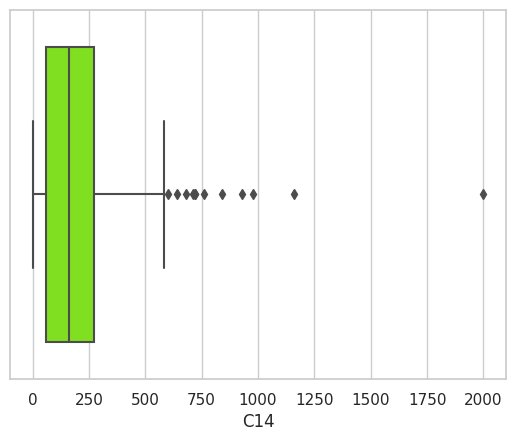

In [ ]:
#Outlier Detuction using Box Plot for "C14" Column
sns.set(style="whitegrid")
sns.boxplot(x=df['C14'], color='Chartreuse')

In [ ]:
# removing outlier for 'C14' column
iqr = df.C14.quantile(0.75) - df.C14.quantile(0.25)
upper_threshold = df.C14.quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = df.C14.quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
print(upper_threshold,lower_threshold)

df.C14 = df.C14.clip (int(lower_threshold), int(upper_threshold))

590.0 -258.0


**Column "C15"**

<Axes: xlabel='C15'>

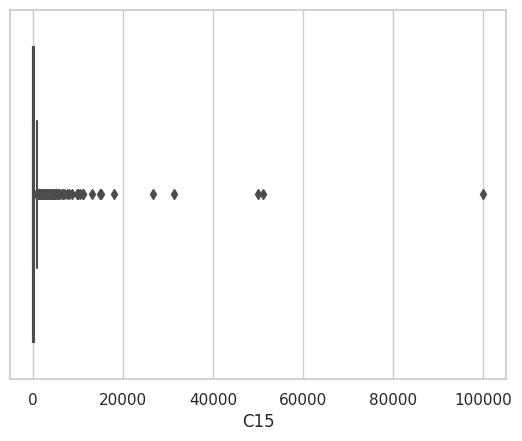

In [ ]:
#Outlier Detuction using Box Plot for "C15" Column
sns.set(style="whitegrid")
sns.boxplot(x=df['C15'], color='Chartreuse')

In [ ]:
# removing outlier for 'C15' column
iqr = df.C15.quantile(0.75) - df.C15.quantile(0.25)
upper_threshold = df.C15.quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = df.C15.quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
print(upper_threshold,lower_threshold)

df.C15 = df.C15.clip (lower_threshold, upper_threshold)

988.75 -593.25


### **Finding Duplicate Values**

In [ ]:
#checking for no of duplicate values
df.duplicated().sum()

0

From the above result we can find zero duplicate data.


# **Encoding**


Encoding for 'C4', 'C5', 'C6', 'C7' column (Label Encoding)

In [ ]:
print("Unique values of C4 are \n", df.C4.value_counts())
print("\n Unique values of C5 are \n", df.C5.value_counts())
print("\n Unique values of C6 are \n", df.C6.value_counts())
print("\n Unique values of C7 are \n", df.C7.value_counts())
print("\n Unique values of C13 are \n", df.C13.value_counts())

Unique values of C4 are 
 u    525
y    163
l      2
Name: C4, dtype: int64

 Unique values of C5 are 
 g     525
p     163
gg      2
Name: C5, dtype: int64

 Unique values of C6 are 
 c     146
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: C6, dtype: int64

 Unique values of C7 are 
 v     408
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: C7, dtype: int64

 Unique values of C13 are 
 g    625
s     57
p      8
Name: C13, dtype: int64


From all the above results all values are unique which means there is no incorrect or wrong data that is spelling mistake, upper case and lower case mismatch of each values.

In [ ]:
df['C1'] = df['C1'].map({"b" : 1, "a" : 0})

df['C4']=df['C4'].map({'u':1,'y':2,'l':3})

df['C5']=df['C5'].map({'g':1,'p':2,'gg':3})

df['C6']=df['C6'].map({'c':1,'q':2,'w':3,'i':4,'aa':5,'ff':6,'k':7,'cc':8,'m':9,'x': 10, 'd':11, 'e':12, 'j': 13, "r": 14})

df['C7']=df['C7'].map({'v':1,'h':2,'bb':3,'ff':4,'j':5,'z':6,'dd':7,'n':8,'o':9})

df['C9'] = df['C9'].map({"t" : 1, "f" : 0})
df['C10'] = df['C10'].map({"t" : 1, "f" : 0})
df['C12'] = df['C12'].map({"f" : 1, "t" : 0})
df['C13']=df['C13'].map({'g':1,'s':2,'p':3})


In [ ]:
df.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Hired
0,1,30.83,0.000,1,1,3,1,1.25,1,1,1.0,1,1,202,0.0,1
1,0,58.67,4.460,1,1,2,2,3.04,1,1,6.0,1,1,43,560.0,1
2,0,24.50,0.500,1,1,2,2,1.50,1,0,0.0,1,1,280,824.0,1
3,1,27.83,1.540,1,1,3,1,3.75,1,1,5.0,0,1,100,3.0,1
4,1,20.17,5.625,1,1,3,1,1.71,1,0,0.0,1,2,120,0.0,1


# **EDA - Exploratory Data Analysis**

EDA is an important step in the data analysis process, as it helps to identify potential issues with the data and to develop a deeper understanding of the relationships between variables.

### **Distribution of Feature and Target variable**

Create basic visualizations to understand the data's distribution and characteristics. Since I don't know the column names, I can't make specific plots for each column. However, I create generic visualizations like histograms, bar plots to examine relationships between columns. Libraries like Matplotlib or Seaborn can help.

**Column "C1"**

<Axes: xlabel='C1', ylabel='count'>

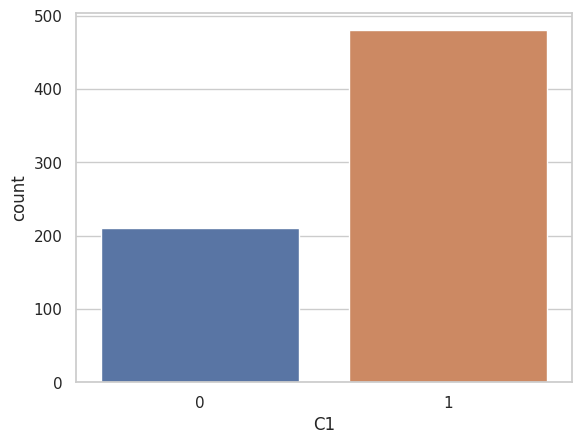

In [ ]:
sns.countplot(x ='C1', data = df)

In the above plot, "b" : 1,

                   "a" : 0

 Most Target : b

Least Target :a

**Column "C2"**

<Axes: xlabel='C2', ylabel='Count'>

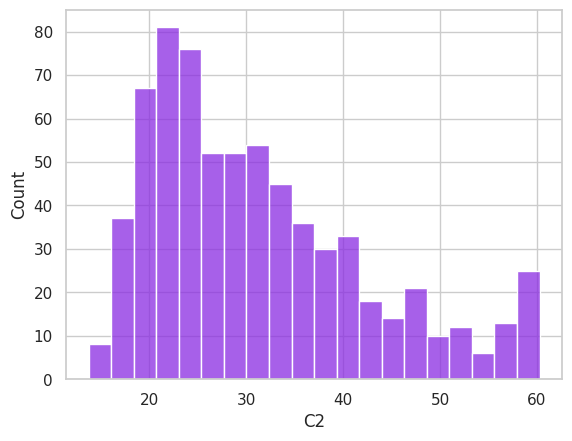

In [ ]:
sns.histplot(data=df, x=df["C2"],bins=20,color='BlueViolet')

from the above graph, column "C2" heighest values between 20-30

**Column "C3"**

<Axes: xlabel='C3', ylabel='Count'>

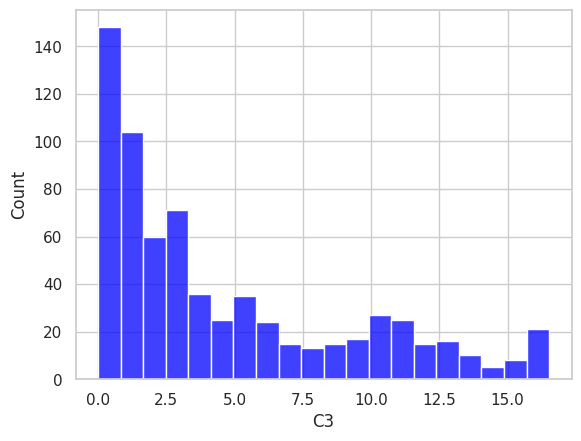

In [ ]:
sns.histplot(data=df, x=df["C3"],bins=20,color='blue')

from the above graph, column "C3" heighest values between 0-2.5

**Column "C4"**

<Axes: xlabel='C4', ylabel='count'>

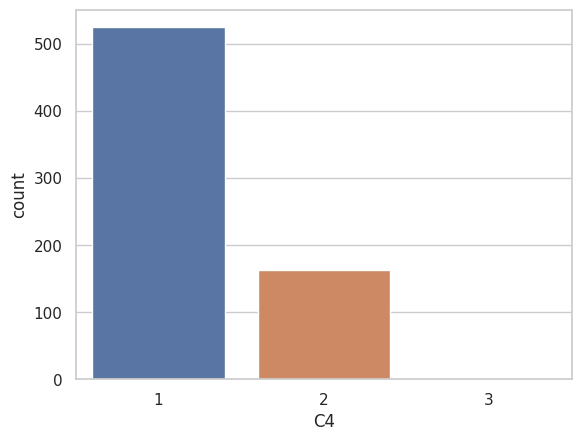

In [ ]:
sns.countplot(x ='C4', data = df)

In the above plot,
                    'u':1,  'y':2,  'l':3.

                   

and

Most Target : 1 (u)

Least Target : 3 (l)

**Column "C5"**

<Axes: xlabel='C5', ylabel='count'>

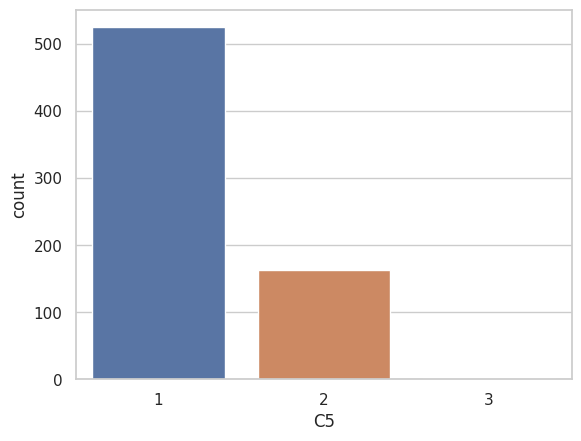

In [ ]:
sns.countplot(x ='C5', data = df)

In the above plot, 'g':1,'p':2,'gg':3
and

Most Target : 1 (g)

Least Target : 3 (gg)

**Column "C6"**

<Axes: xlabel='C6', ylabel='count'>

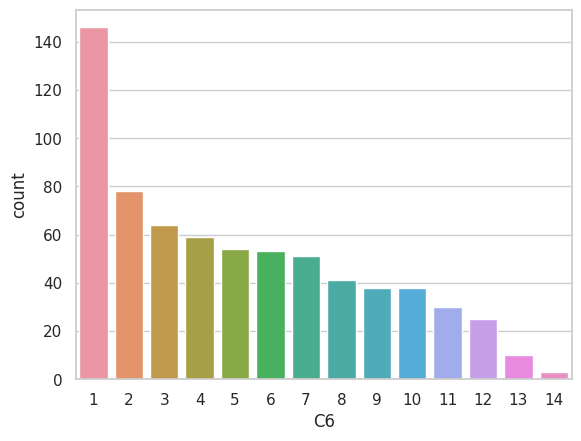

In [ ]:
sns.countplot(x ='C6', data = df)

In the above plot, 'c':1,'q':2,'w':3,'i':4,'aa':5,'ff':6,'k':7,'cc':8,'m':9,'x': 10, 'd':11, 'e':12, 'j': 13, "r": 14

Most Target : 1 (c)

Least Target : 14 (r)

**Column "C7"**

<Axes: xlabel='C7', ylabel='count'>

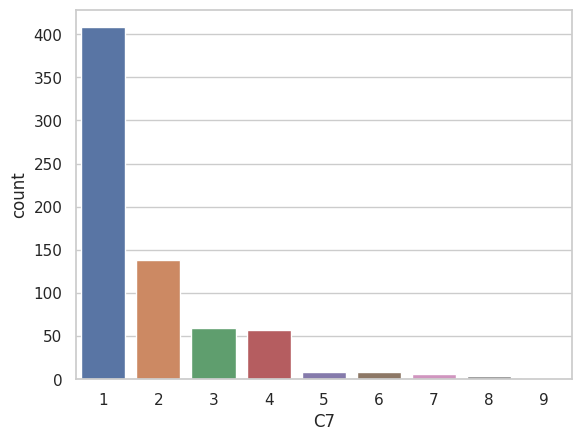

In [ ]:
sns.countplot(x ='C7', data = df)

In the above plot, ''v':1,'h':2,'bb':3,'ff':4,'j':5,'z':6,'dd':7,'n':8,'o':9

Most Target : 1 (v)

Least Target : 9 (o)



**Column "C8"**

<Axes: xlabel='C8', ylabel='Count'>

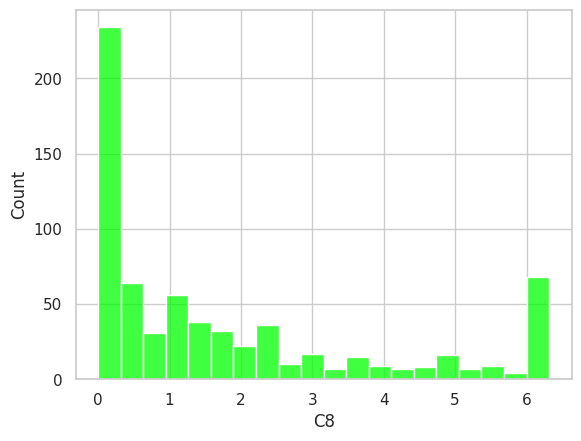

In [ ]:
sns.histplot(data=df, x=df["C8"],bins=20,color='Lime')

from the above graph, column "C8" heighest values between 0-1

**Column "C9"**

<Axes: xlabel='C9', ylabel='count'>

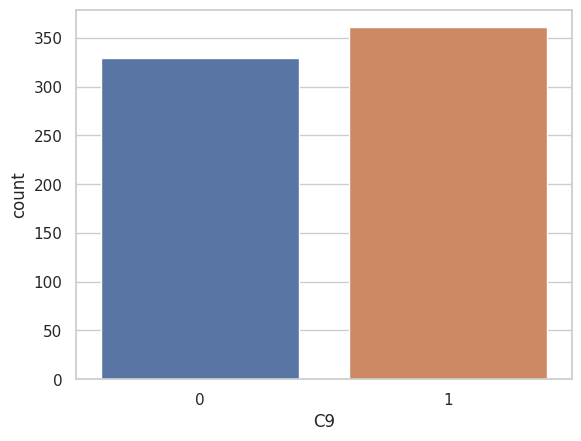

In [ ]:
sns.countplot(x ='C9', data = df)

In the above plot, "t" : 1, "f" : 0

Most Target : 1 (t)

Least Target : 0 (f)

**Column "C10"**

<Axes: xlabel='C10', ylabel='count'>

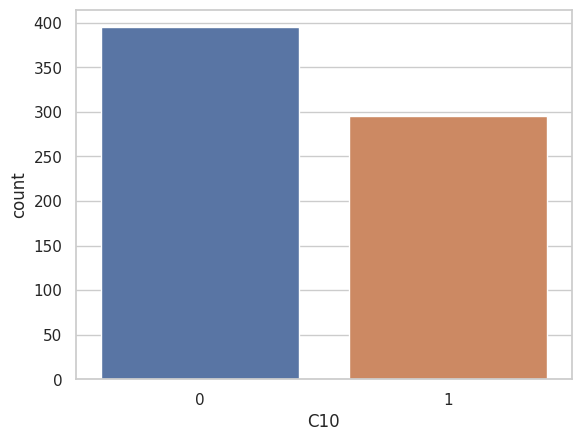

In [ ]:
sns.countplot(x ='C10', data = df)

In the above plot, "t" : 1, "f" : 0

Most Target : 0 (f)

Least Target : 1 (t)

**Column "C11"**

<Axes: xlabel='C11', ylabel='Count'>

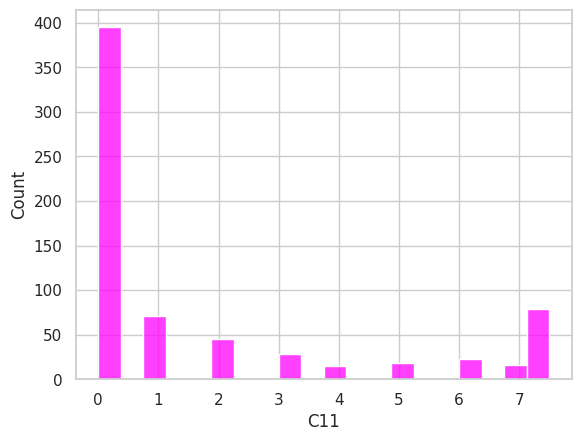

In [ ]:
sns.histplot(data=df, x=df["C11"],bins=20,color='Magenta')

In the above plot, majority of the values are "0"

**Column "C12"**

<Axes: xlabel='C12', ylabel='count'>

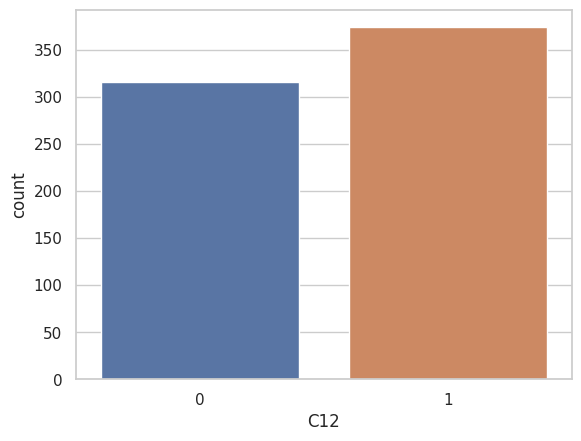

In [ ]:
sns.countplot(x ='C12', data = df)

In the above plot, "f" : 1, "t" : 0

Most Target : 1 (t)

Least Target : 0 (f)

**Column "C13"**

<Axes: xlabel='C13', ylabel='count'>

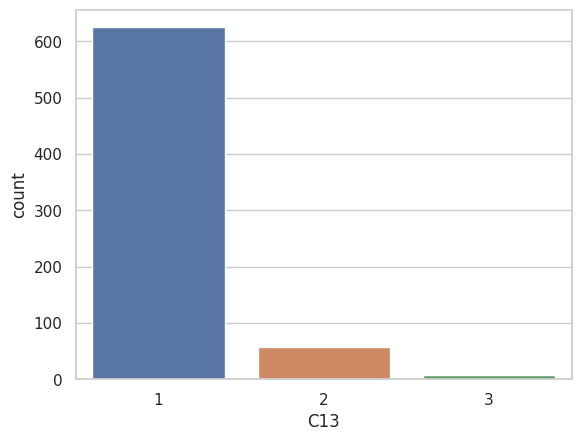

In [ ]:
sns.countplot(x ='C13', data = df)


In the above plot, 'g':1,'s':2,'p':3

Most Target : 1 (g)

Least Target : 0 (p)

**Column "C14"**

<Axes: xlabel='C14', ylabel='Count'>

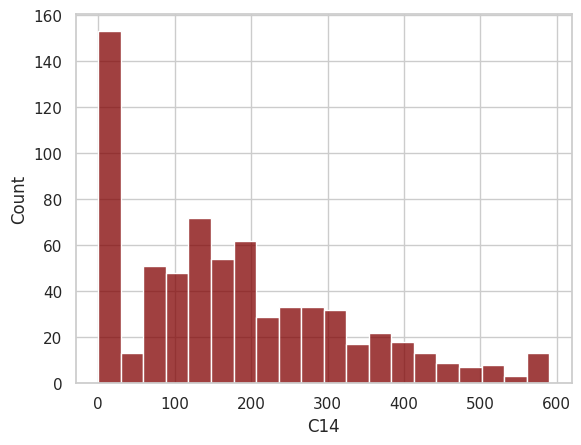

In [ ]:
sns.histplot(data=df, x=df["C14"],bins=20,color='maroon')

from the above graph, column "C14" heighest values between 0-50

**Column "C15"**

<Axes: xlabel='C15', ylabel='Count'>

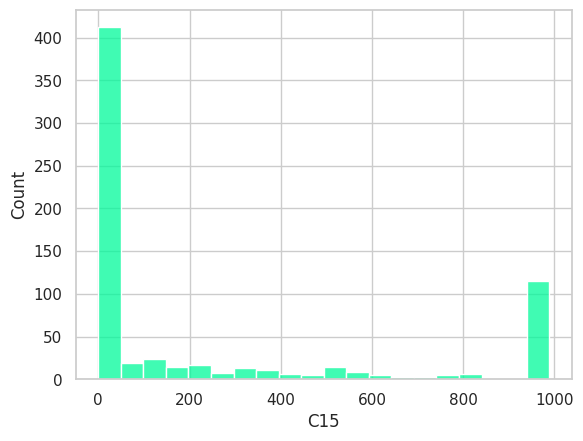

In [ ]:
sns.histplot(data=df, x=df["C15"],bins=20,color='MediumSpringGreen')

from the above graph, column "C15" heighest values:0 & 1000

**Hired**

<Axes: xlabel='Hired', ylabel='count'>

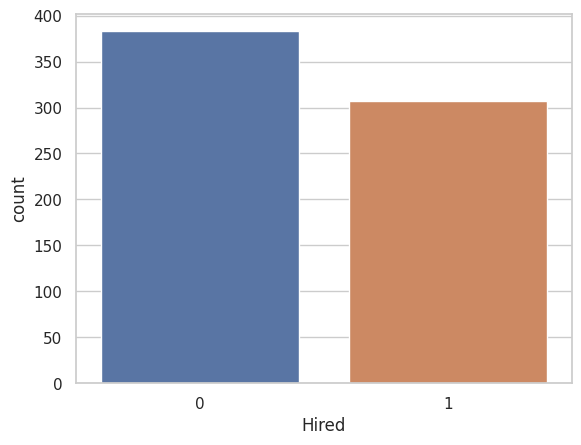

In [ ]:
sns.countplot(x ='Hired', data = df)

No of people hired is less compared to not hired


# **Feature and Target Selection**

In [ ]:
df.columns

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'Hired'],
      dtype='object')

In [ ]:
# X --> Feature y-- > Target

x = df[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15']].values
y=df['Hired'].values

In [ ]:
# splitting the data as train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 3 )


# **Scaling**

In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# **Modelling**

## **Logistic Regression**


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()

lr.fit(x_train_scaled,y_train)
lr.score(x_test_scaled,y_test)

0.7536231884057971

In [ ]:
y_pred=lr.predict_proba(x_test_scaled)
y_pred

array([[0.94576256, 0.05423744],
       [0.98384504, 0.01615496],
       [0.77416678, 0.22583322],
       [0.09676833, 0.90323167],
       [0.99309533, 0.00690467],
       [0.01119935, 0.98880065],
       [0.72099888, 0.27900112],
       [0.02519361, 0.97480639],
       [0.11879745, 0.88120255],
       [0.21288367, 0.78711633],
       [0.02130682, 0.97869318],
       [0.94276001, 0.05723999],
       [0.00712796, 0.99287204],
       [0.01857388, 0.98142612],
       [0.4772501 , 0.5227499 ],
       [0.97842136, 0.02157864],
       [0.56814333, 0.43185667],
       [0.02947543, 0.97052457],
       [0.95201558, 0.04798442],
       [0.05464306, 0.94535694],
       [0.94466154, 0.05533846],
       [0.01013811, 0.98986189],
       [0.24005292, 0.75994708],
       [0.9770408 , 0.0229592 ],
       [0.96504517, 0.03495483],
       [0.00575344, 0.99424656],
       [0.21645914, 0.78354086],
       [0.97913151, 0.02086849],
       [0.93997538, 0.06002462],
       [0.01286011, 0.98713989],
       [0.

In [ ]:
log_reg_auroc = roc_auc_score(y_test,y_pred[:,1])
print("AUROC score for logistic regression  :  ",round(log_reg_auroc,2))

AUROC score for logistic regression  :   0.85


## **K-Nearest Neighbour (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_scaled, y_train)
  print("K value :", i, "Train Score : ", knn.score(x_train_scaled,y_train), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test_scaled, y_test, cv=10)))

K value : 1 Train Score :  1.0 Cross Value Accuracy : 0.7549450549450548
K value : 2 Train Score :  0.8985507246376812 Cross Value Accuracy : 0.7252747252747253
K value : 3 Train Score :  0.9202898550724637 Cross Value Accuracy : 0.7406593406593407
K value : 4 Train Score :  0.8894927536231884 Cross Value Accuracy : 0.7835164835164835
K value : 5 Train Score :  0.9112318840579711 Cross Value Accuracy : 0.7983516483516484
K value : 6 Train Score :  0.8876811594202898 Cross Value Accuracy : 0.8049450549450551
K value : 7 Train Score :  0.8967391304347826 Cross Value Accuracy : 0.8120879120879122
K value : 8 Train Score :  0.8804347826086957 Cross Value Accuracy : 0.8049450549450551
K value : 9 Train Score :  0.8876811594202898 Cross Value Accuracy : 0.8192307692307693
K value : 10 Train Score :  0.8713768115942029 Cross Value Accuracy : 0.8043956043956044
K value : 20 Train Score :  0.8731884057971014 Cross Value Accuracy : 0.8120879120879121
K value : 30 Train Score :  0.858695652173913

**k=9 is a good cross validation accuracy of 0.819**

In [ ]:
knn= KNeighborsClassifier(i)
knn.fit(x_train_scaled, y_train)
print("KNN Score: ",knn.score(x_test_scaled,y_test))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(x_test)[:, 1]))


KNN Score:  0.8043478260869565
AUROC on the sampled dataset :  0.7388468013468014


## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Decision Tree Score : ", dt.score(x_train,y_train))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  1.0
AUROC on the sampled dataset :  0.8042929292929293


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(x_train, y_train) # the model is trained
  trainAccuracy = accuracy_score(y_train, dt.predict(x_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x_test_scaled, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.8786231884057971  Cross val score :  0.7615384615384615
Depth  :  2  Training Accuracy :  0.8786231884057971  Cross val score :  0.7175824175824176
Depth  :  3  Training Accuracy :  0.8840579710144928  Cross val score :  0.7252747252747254
Depth  :  4  Training Accuracy :  0.9112318840579711  Cross val score :  0.7318681318681319
Depth  :  5  Training Accuracy :  0.9257246376811594  Cross val score :  0.7175824175824176
Depth  :  6  Training Accuracy :  0.9528985507246377  Cross val score :  0.7104395604395604
Depth  :  7  Training Accuracy :  0.9710144927536232  Cross val score :  0.7027472527472527
Depth  :  8  Training Accuracy :  0.9782608695652174  Cross val score :  0.6741758241758242
Depth  :  9  Training Accuracy :  0.9909420289855072  Cross val score :  0.75989010989011
Depth  :  10  Training Accuracy :  0.9963768115942029  Cross val score :  0.7098901098901098
Depth  :  20  Training Accuracy :  1.0  Cross val score :  0.7093406593406594


**k= 1 is the good cross validation score of 0.761**

In [ ]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(x_train,y_train)
print("Decision Tree Score : ", dt.score(x_train,y_train))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  0.8786231884057971
AUROC on the sampled dataset :  0.7645202020202021


## **XG Boost**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train,y_train) #train the model
  print("Learning rate : ", lr," Train score : ", model.score(x_train,y_train)," Cross-Val score : ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))


Learning rate :  0.01  Train score :  0.9510869565217391  Cross-Val score :  0.7978021978021979
Learning rate :  0.02  Train score :  0.9637681159420289  Cross-Val score :  0.7901098901098901
Learning rate :  0.03  Train score :  0.9746376811594203  Cross-Val score :  0.782967032967033
Learning rate :  0.04  Train score :  0.9836956521739131  Cross-Val score :  0.7686813186813186
Learning rate :  0.05  Train score :  0.9891304347826086  Cross-Val score :  0.7906593406593406
Learning rate :  0.1  Train score :  1.0  Cross-Val score :  0.7752747252747252
Learning rate :  0.11  Train score :  1.0  Cross-Val score :  0.7758241758241757
Learning rate :  0.12  Train score :  1.0  Cross-Val score :  0.7901098901098902
Learning rate :  0.13  Train score :  1.0  Cross-Val score :  0.7758241758241758
Learning rate :  0.14  Train score :  1.0  Cross-Val score :  0.7758241758241758
Learning rate :  0.15  Train score :  1.0  Cross-Val score :  0.7901098901098902
Learning rate :  0.2  Train score : 

**Learning Rate 0.01 is getting the best cross validation score of 0.7978**

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

In [ ]:
#doing cross validation to get best value of max _depth to prevent overfitted model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(x_train, y_train) # the model is trained
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, x_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  1.0  Cross val score :  0.8459415584415584
Depth  :  2  Training Accuracy :  1.0  Cross val score :  0.8658766233766233
Depth  :  3  Training Accuracy :  1.0  Cross val score :  0.8768181818181817
Depth  :  4  Training Accuracy :  1.0  Cross val score :  0.8768181818181817
Depth  :  5  Training Accuracy :  1.0  Cross val score :  0.8804545454545455
Depth  :  6  Training Accuracy :  1.0  Cross val score :  0.8912987012987014
Depth  :  7  Training Accuracy :  1.0  Cross val score :  0.8858441558441559
Depth  :  8  Training Accuracy :  1.0  Cross val score :  0.9002922077922078
Depth  :  9  Training Accuracy :  1.0  Cross val score :  0.8985389610389609
Depth  :  10  Training Accuracy :  1.0  Cross val score :  0.9003896103896103


**Depth = 10 is giving the good cross validation score fo 0.9003**

# **Solution Statement**

Models are tested, below are the AUROC value of each model

*   **Logistic Regression** - AUROC Score is **0.85**
*   **KNN** - AUROC Score is  **0.819**
*   **Decision Tree** - AUROC Score is **0.761**
*   **XG Boost** - AUROC Score is  **0.7978**
*   **Random Forest** - AUROC Score is **0.9003**

**Hence Random Forest is giving the good AUROC Score of 0.9003, so Random Forest is the best model for candidates Hiring prediction**





# **Feature Importance**

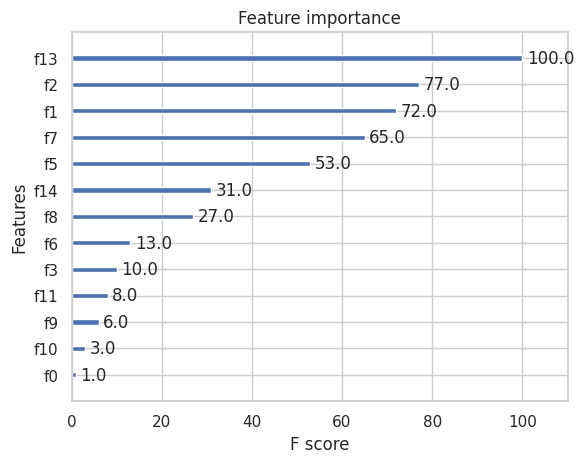

In [ ]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()

In [ ]:
df.columns

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'Hired'],
      dtype='object')

f0 - C1, f1 - C2, f2 - C3, f3- C4,
f4 - C5, f5 - C6, f6 - C7, f7 -C8, f8 - C9,
f9 - C10, f10 -C11, f10-C12, f11-C13, f12-C14, f13-C15


### **Conclusion:**

Based on the Feature Importance given by best machine Learning that will predict if a candidate is Hired or not.

The client should focused on the top few features of order given below to have them hired to the company.

C15, C3, C2, C8, C6.
